In [81]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt

In [82]:
def poltImage(images_arr):
    numbers = images_arr.shape[0]
    fig, axes = plt.subplots(1, numbers, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

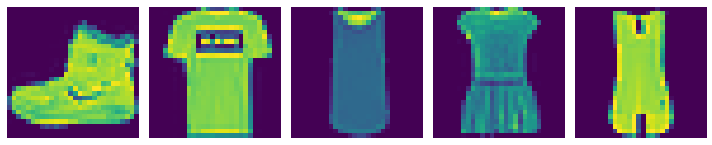

In [83]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
poltImage(x_train[:5])


In [84]:
# normalization
x_train, x_test = x_train/255.0, x_test/255.0


In [85]:
# full connection model
def build_model():
    model = tf.keras.models.Sequential([
        layers.Reshape((28, 28, 1), input_shape=(28, 28)),
        layers.Conv2D(128, (5,5), activation='relu'),
        layers.MaxPool2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, use_bias=False, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [86]:
model = build_model()
model.summary()
model.compile(
    optimizer=tf.keras.optimizers.Adam(), # function 的括号不要丢了
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    # 这里不能使用 tf.keras.metrics.Accuracy()
)  
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# 等价



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_11 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 128)       3328      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
global_average_pooling2d_10  (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               65536     
_________________________________________________________________
dense_23 (Dense)             (None, 10)              

In [87]:
model.fit(x_train, y_train, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.7587 - sparse_categorical_accuracy: 0.7128

In [88]:
model.save_weights('./fashion_mnist/ckpt')


In [89]:
model1 = build_model()
model1.load_weights('./fashion_mnist/ckpt')

In [90]:
model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model1.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.24327600237727165, 0.9137]